# Chapter 4 - Utility Theory

## 1. Interdisciplinary Application: The St. Petersburg Paradox

### Daniel Bernoulli (1738)

In 1738, Daniel Bernoulli published *Specimen theoriae novae de mensura sortis* (Exposition of a New Theory on the Measurement of Risk), addressing a paradox that challenged the prevailing idea that rational decisions are based solely on **Expected Value**.

**The Game:**
A fair coin is tossed repeatedly until a tail appears. The pot starts at $2 and doubles every time a head appears.
- 1st toss is Tail: Payoff = $2
- 1st Head, 2nd Tail: Payoff = $4
- 1st Head, 2nd Head, 3rd Tail: Payoff = $8
- ...
- $n$ Heads, then Tail: Payoff = $2^{n+1}$

**The Paradox:**
The **Expected Value** ($E[V]$) of this game is infinite:
$$
E[V] = \frac{1}{2}(2) + \frac{1}{4}(4) + \frac{1}{8}(8) + ... = 1 + 1 + 1 + ... = \infty
$$

If decisions were based on maximizing expected wealth, a rational person should be willing to pay **any amount** to play this game. However, in reality, few people would pay even $25 to play. Why?

**Bernoulli's Solution: Utility**
Bernoulli argued that people do not maximize *expected monetary value*, but rather **Expected Utility**. The "utility" (satisfaction/value) of money diminishes as you have more of it (**Diminishing Marginal Utility**).

If we use a logarithmic utility function, $u(x) = \ln(x)$, the value of the game becomes finite, explaining why people don't pay infinite sums.

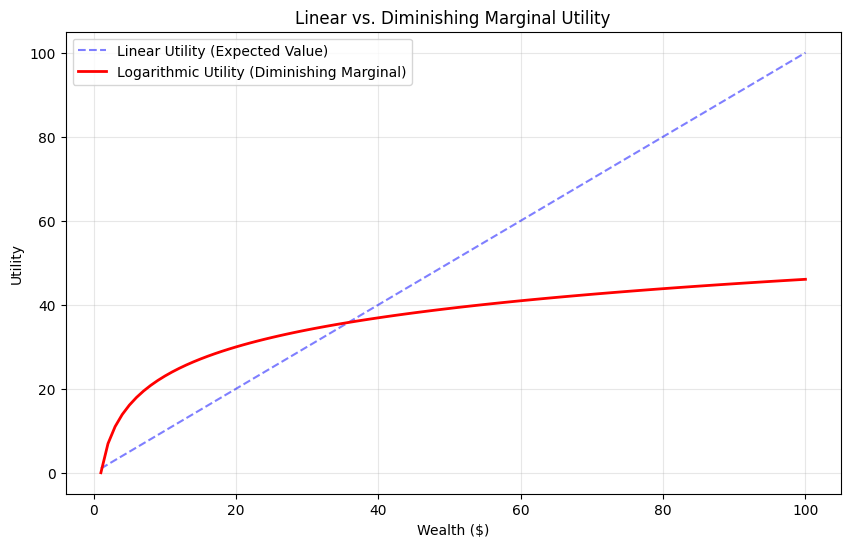

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_marginal_utility():
    wealth = np.linspace(1, 100, 100)
    linear_u = wealth  # Risk Neutral
    log_u = 10 * np.log(wealth)  # Risk Averse (Bernoulli)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(wealth, linear_u, 'b--', label='Linear Utility (Expected Value)', alpha=0.5)
    ax.plot(wealth, log_u, 'r-', label='Logarithmic Utility (Diminishing Marginal)', linewidth=2)
    
    ax.set_title('Linear vs. Diminishing Marginal Utility')
    ax.set_xlabel('Wealth ($)')
    ax.set_ylabel('Utility')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()

plot_marginal_utility()

## 2. Rational Preferences

To build a theory of rational choice, we start with **Preferences**. A preference relation $\succeq$ allows an agent to compare options in a set $X$.

- $x \succeq y$: "x is at least as good as y" (Weak Preference)
- $x \succ y$: "x is strictly better than y" ($x \succeq y$ and not $y \succeq x$)
- $x \sim y$: "indifferent between x and y" ($x \succeq y$ and $y \succeq x$)

### Axioms of Rationality
For preferences to be consistent, we assume:

1.  **Completeness**:
    For any two options $x, y \in X$, either $x \succeq y$ or $y \succeq x$ (or both). You cannot say "I don't know" or "they are incomparable".

2.  **Transitivity**:
    For any $x, y, z \in X$, if $x \succeq y$ and $y \succeq z$, then $x \succeq z$.
    *Violation Example:* Stone-Paper-Scissors (Cycles are irrational in utility theory, though they exist in games).

If preferences are Complete and Transitive, we can represent them with a **Utility Function** $u(x)$ such that:
$$ u(x) \ge u(y) \iff x \succeq y $$

## 3. Risk Attitudes

When facing uncertainty (like the St. Petersburg game), an agent chooses the option with the highest **Expected Utility**.
$$ E[u(L)] = \sum_{i} p_i u(x_i) $$

The shape of the utility function $u(x)$ determines the agent's attitude towards risk.

### 1. Risk Neutral
- Utility is **Linear**: $u(x) = x$
- $E[u(L)] = u(E[L])$
- Indifferent between getting $50 for sure and a gamble with expected value $50.

### 2. Risk Averse
- Utility is **Concave**: $u''(x) < 0$ (e.g., $\sqrt{x}, \ln(x)$)
- $u(E[L]) > E[u(L)]$
- Prefers a sure thing over a gamble with the same expected value.
- *Example:* Insurance. You pay a premium (sure loss) to avoid a small chance of a large loss, because $u(Wealth - Premium) > E[u(Risky Wealth)]$.

### 3. Risk Loving
- Utility is **Convex**: $u''(x) > 0$ (e.g., $x^2$)
- $E[u(L)] > u(E[L])$
- Prefers the gamble over the sure thing.
- *Example:* Buying lottery tickets (mathematically irrational for risk neutrals/averse, but rational if you love the "thrill" or have convex utility).

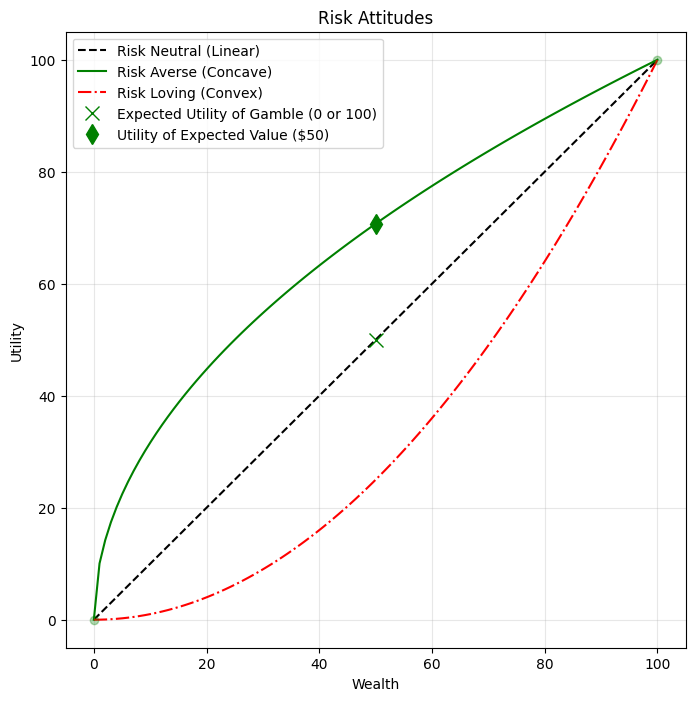

In [2]:
def plot_risk_attitudes():
    x = np.linspace(0, 100, 100)
    
    u_neutral = x
    u_averse = x**0.5 * 10  # Scaled for visibility
    u_loving = x**2 / 100   # Scaled for visibility
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.plot(x, u_neutral, 'k--', label='Risk Neutral (Linear)')
    ax.plot(x, u_averse, 'g-', label='Risk Averse (Concave)')
    ax.plot(x, u_loving, 'r-.', label='Risk Loving (Convex)')
    
    # Illustrate Jensens Inequality for Risk Aversion
    # Lottery: 50/50 chance of 0 or 100.
    # EV = 50. 
    # EU (Averse) = 0.5*u(0) + 0.5*u(100) = 0.5*0 + 0.5*100 = 50
    # u(EV) = u(50) = sqrt(50)*10 = 70.7
    # Since 70.7 > 50, they prefer the sure thing.
    
    ax.plot([0, 100], [0, 100], 'go', alpha=0.3) # Outcomes on curve
    ax.plot([50], [50], 'gx', markersize=10, label='Expected Utility of Gamble (0 or 100)')
    ax.plot([50], [70.7], 'gd', markersize=10, label='Utility of Expected Value ($50)')

    ax.set_title('Risk Attitudes')
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Utility')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()

plot_risk_attitudes()

## 4. The Allais Paradox (1953)

The **Allais Paradox** is a famous example that challenges the Independence Axiom of Expected Utility Theory. Maurice Allais observed that real human choices often violate the logic of "rational" utility maximization when extreme probabilities are involved.

### The Experiment
You are asked to choose between two lotteries in **Experiment 1** and two lotteries in **Experiment 2**.

**Experiment 1:**
- **Option A**: 100% chance of receiving **$1 Million**.
- **Option B**: 10% chance of **$5 Million**, 89% chance of **$1 Million**, 1% chance of **Minimum ($0)**.

**Experiment 2:**
- **Option C**: 11% chance of **$1 Million**, 89% chance of **$0**.
- **Option D**: 10% chance of **$5 Million**, 90% chance of **$0**.

**The Paradox:**
- Most people choose **A** (prefer certainty) and **D** (prefer the big win since both are unlikely).
- However, Expected Utility Theory proves that if you choose A, **you must choose C** to be consistent. Choosing A and D is a contradiction.

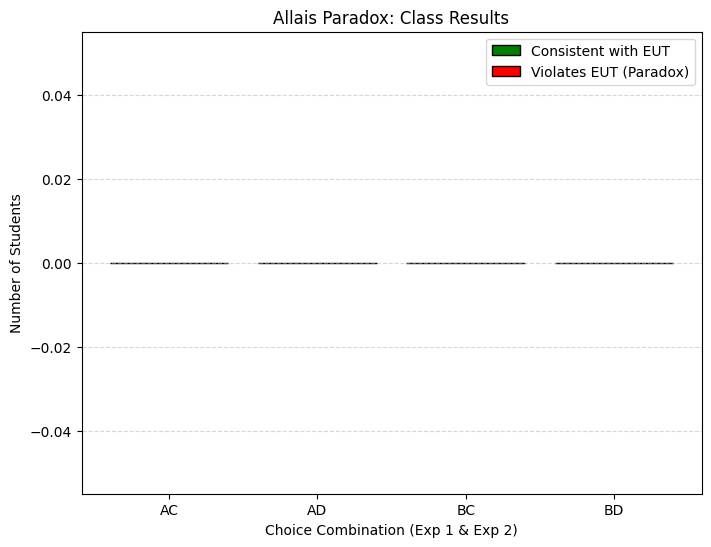

In [3]:
# Class Experiment: Input Student Answers
import matplotlib.pyplot as plt

# --- INPUT DATA HERE ---
# Count how many students chose each pair:
strategies = {
    'AC': 0,  # Consistent (Safe)
    'AD': 0,  # Paradox (Common Human Choice)
    'BC': 0,  # Paradox (Rare)
    'BD': 0   # Consistent (Risky)
}

# Example Data (Replace with class counts)
# e.g., strategies['AD'] = 15

def plot_allais_results(data):
    labels = list(data.keys())
    counts = list(data.values())
    colors = ['green', 'red', 'red', 'green']  # Green=Consistent, Red=Paradox
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=colors, edgecolor='black')
    
    # Annotations
    ax.set_title('Allais Paradox: Class Results')
    ax.set_xlabel('Choice Combination (Exp 1 & Exp 2)')
    ax.set_ylabel('Number of Students')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', label='Consistent with EUT'),
        Patch(facecolor='red', edgecolor='black', label='Violates EUT (Paradox)')
    ]
    ax.legend(handles=legend_elements)
    
    plt.show()
    
    total = sum(counts)
    if total > 0:
        paradox_rate = (data['AD'] + data['BC']) / total * 100
        print(f"Total Students: {total}")
        print(f"Paradox Rate: {paradox_rate:.1f}% (Students violating Expected Utility Theory)")

plot_allais_results(strategies)

### Mathematical Proof: Why 'AD' is Contradictory

According to the **Independence Axiom**, if you mix two lotteries with a third, the preference order should not change. Let's decompose the options:

- **Option A**: 11% ($1M) + 89% ($1M)
- **Option B**: 10% ($5M) + 1% ($0) + 89% ($1M)
- **Option C**: 11% ($1M) + 89% ($0)
- **Option D**: 10% ($5M) + 1% ($0) + 89% ($0)

Notice that the **middle column (89% chance)** is identical for A & B (it's $1M) and identical for C & D (it's $0).

According to the Independence Axiom, we should be able to "cancel out" this common outcome. If we ignore the 89% part, the choice simplifies to:

- **A vs B Simplified**: 11% chance of $1M **vs** 10% chance of $5M + 1% chance of $0.
- **C vs D Simplified**: 11% chance of $1M **vs** 10% chance of $5M + 1% chance of $0.

These are **exactly the same choice!** Therefore, if you prefer A over B (Safe), you MUST prefer C over D (Safe). If you prefer D over C (Risky), you MUST prefer B over A (Risky).

### Why Humans "Fail" This Logic

The paradox highlights two major psychological phenomena:

1.  **The Certainty Effect**: We overvalue outcomes that are certain (100% chance) compared to those that are merely highly probable. In Experiment 1, people aren't willing to risk the "sure thing" for a 1% chance of nothing.
2.  **Regret Aversion**: People imagine how they would feel if they picked Option B and hit the 1% chance of $0. The regret of losing a guaranteed million is much higher than the regret of losing an 11% gamble (Option C).

This observation eventually led to the development of **Prospect Theory** by Daniel Kahneman and Amos Tversky, which better accounts for how humans actually perceive risk.

## 5. Bibliography

*   **Bernoulli, D.** (1738). *Specimen theoriae novae de mensura sortis*.
*   **Allais, M.** (1953). *Le comportement de l'homme rationnel devant le risque*.
*   **Von Neumann, J., & Morgenstern, O.** (1944). *Theory of Games and Economic Behavior*.
*   **Mas-Colell, A., Whinston, M. D., & Green, J. R.** (1995). *Microeconomic Theory*.